# Jupyter notebook sample

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import matplotlib as mpl
from matplotlib import font_manager

def set_chinese_font():
    """
    自动检测系统可用的常见中文字体，并设置为 matplotlib 默认字体。
    """
    # 常见的中文字体候选（按常见度排序）
    candidates = [
        "Microsoft YaHei",   # Windows 微软雅黑
        "SimHei",            # Windows 黑体
        "PingFang SC",       # macOS 苹方
        "Heiti SC",          # macOS 黑体
        "Songti SC",         # macOS 宋体
        "STSong",            # Windows/部分系统宋体
        "Noto Sans CJK SC",  # Linux/跨平台 思源黑体
        "WenQuanYi Micro Hei" # Linux 文泉驿微米黑
    ]

    # 找出系统里实际有的字体
    available = set(f.name for f in font_manager.fontManager.ttflist)

    for font in candidates:
        if font in available:
            mpl.rcParams["font.family"] = font
            mpl.rcParams["axes.unicode_minus"] = False  # 修复负号显示
            print(f"已设置中文字体: {font}")
            return font

    print("未找到常见中文字体，请手动指定字体文件路径。")
    return None

# 调用函数
set_chinese_font()



已设置中文字体: Microsoft YaHei


'Microsoft YaHei'

In [4]:
import pandas as pd

data = [
    {"降息周期开始": "1984-10", "背景": "通胀缓解", "3个月标普500表现": "+5%", "12个月表现": "+19%"},
    {"降息周期开始": "1989-06", "背景": "经济放缓", "3个月标普500表现": "-3%", "12个月表现": "-7%"},
    {"降息周期开始": "1995-07", "背景": "软着陆", "3个月标普500表现": "+7%", "12个月表现": "+27%"},
    {"降息周期开始": "1998-09", "背景": "亚洲金融危机", "3个月标普500表现": "+14%", "12个月表现": "+21%"},
    {"降息周期开始": "2001-01", "背景": "互联网泡沫破裂", "3个月标普500表现": "-10%", "12个月表现": "-13%"},
    {"降息周期开始": "2007-09", "背景": "金融危机前奏", "3个月标普500表现": "-8%", "12个月表现": "-37%"},
    {"降息周期开始": "2019-07", "背景": "预防性降息", "3个月标普500表现": "+3%", "12个月表现": "+9%"},
    {"降息周期开始": "2020-03", "背景": "新冠疫情", "3个月标普500表现": "+20%", "12个月表现": "+38%"},
]

df = pd.DataFrame(data)
print(df)


    降息周期开始       背景 3个月标普500表现 12个月表现
0  1984-10     通胀缓解        +5%   +19%
1  1989-06     经济放缓        -3%    -7%
2  1995-07      软着陆        +7%   +27%
3  1998-09   亚洲金融危机       +14%   +21%
4  2001-01  互联网泡沫破裂       -10%   -13%
5  2007-09   金融危机前奏        -8%   -37%
6  2019-07    预防性降息        +3%    +9%
7  2020-03     新冠疫情       +20%   +38%


已设置中文字体: Microsoft YaHei


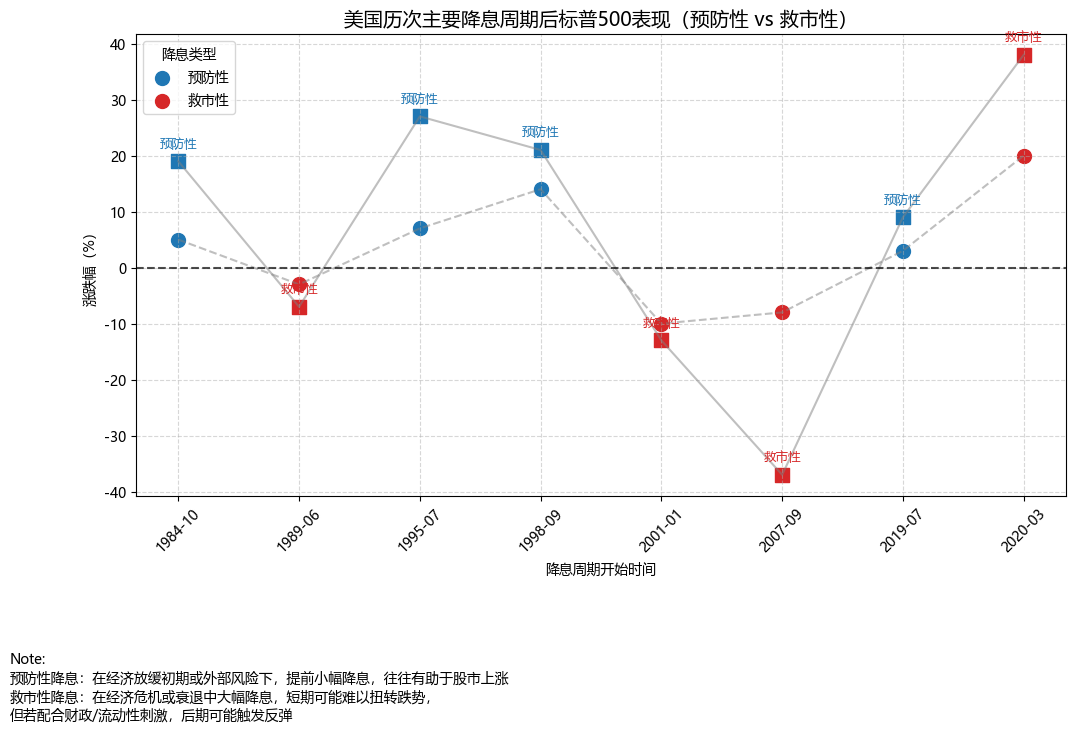

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
# 调用函数
set_chinese_font()
# 数据
data = [
    {"降息周期开始": "1984-10", "背景": "通胀缓解", "3个月标普500表现": "+5%", "12个月表现": "+19%", "降息类型": "预防性"},
    {"降息周期开始": "1989-06", "背景": "经济放缓", "3个月标普500表现": "-3%", "12个月表现": "-7%", "降息类型": "救市性"},
    {"降息周期开始": "1995-07", "背景": "软着陆", "3个月标普500表现": "+7%", "12个月表现": "+27%", "降息类型": "预防性"},
    {"降息周期开始": "1998-09", "背景": "亚洲金融危机", "3个月标普500表现": "+14%", "12个月表现": "+21%", "降息类型": "预防性"},
    {"降息周期开始": "2001-01", "背景": "互联网泡沫破裂", "3个月标普500表现": "-10%", "12个月表现": "-13%", "降息类型": "救市性"},
    {"降息周期开始": "2007-09", "背景": "金融危机前奏", "3个月标普500表现": "-8%", "12个月表现": "-37%", "降息类型": "救市性"},
    {"降息周期开始": "2019-07", "背景": "预防性降息", "3个月标普500表现": "+3%", "12个月表现": "+9%", "降息类型": "预防性"},
    {"降息周期开始": "2020-03", "背景": "新冠疫情", "3个月标普500表现": "+20%", "12个月表现": "+38%", "降息类型": "救市性"},
]

df_num = pd.DataFrame(data)
df_num["3个月标普500表现"] = df_num["3个月标普500表现"].str.replace("%", "").astype(float)
df_num["12个月表现"] = df_num["12个月表现"].str.replace("%", "").astype(float)

# 颜色映射
color_map = {"预防性": "tab:blue", "救市性": "tab:red"}

plt.figure(figsize=(12,6))

# 画3个月表现
for i, row in df_num.iterrows():
    plt.scatter(row["降息周期开始"], row["3个月标普500表现"],
                color=color_map[row["降息类型"]], marker='o', s=100,
                label=row["降息类型"] if i == df_num["降息类型"].tolist().index(row["降息类型"]) else "")

# 画12个月表现
for i, row in df_num.iterrows():
    plt.scatter(row["降息周期开始"], row["12个月表现"],
                color=color_map[row["降息类型"]], marker='s', s=100)

# 连线
plt.plot(df_num["降息周期开始"], df_num["3个月标普500表现"], linestyle='--', color='gray', alpha=0.5)
plt.plot(df_num["降息周期开始"], df_num["12个月表现"], linestyle='-', color='gray', alpha=0.5)

plt.title("美国历次主要降息周期后标普500表现（预防性 vs 救市性）", fontsize=14)
plt.xlabel("降息周期开始时间")
plt.ylabel("涨跌幅（%）")
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.legend(title="降息类型")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

# 标注
for i, row in df_num.iterrows():
    plt.text(row["降息周期开始"], row["12个月表现"]+2, row["降息类型"],
             ha='center', va='bottom', fontsize=9, color=color_map[row["降息类型"]])

# 添加说明 Note
note_text = (
    "Note:\n"
    "预防性降息：在经济放缓初期或外部风险下，提前小幅降息，往往有助于股市上涨\n"
    "救市性降息：在经济危机或衰退中大幅降息，短期可能难以扭转跌势，\n"
    "但若配合财政/流动性刺激，后期可能触发反弹"
)
plt.gcf().text(0.02, -0.15, note_text, ha="left", va="top", fontsize=10, color="black")

plt.show()
